# **Import all required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# **Load MNIST dataset**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Training set: {x_train.shape}")
print(f"Label of training set: {y_train.shape}")
print(f"Testing set: {x_test.shape}")
print(f"Label of testing set: {y_test.shape}")

Training set: (60000, 28, 28)
Label of training set: (60000,)
Testing set: (10000, 28, 28)
Label of testing set: (10000,)


### **Data Visualization**

Lets look at 9 frist images from training set with their labels.

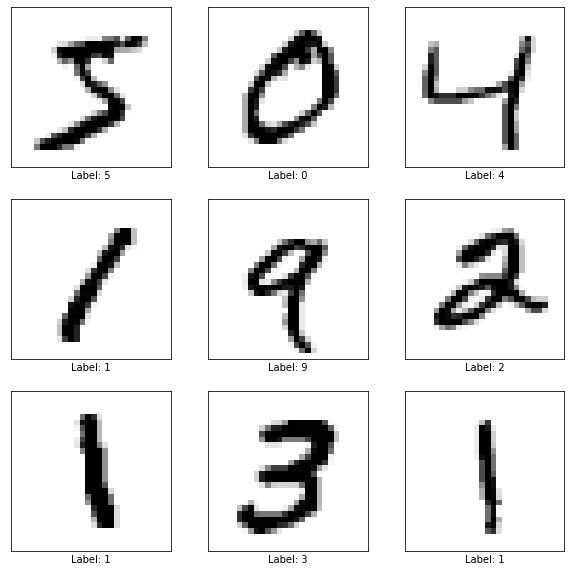

In [ ]:
plt.figure(figsize=(10,10)) 
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
  plt.xlabel(f"Label: {y_train[i]}")
plt.show()

# **Preprocessing the digit images**

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#expand 1 more dimention as 1 for colour channel gray
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
print(f"{x_train.shape}")
print(f"{x_test.shape}")

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Feature Standardization**

It is important preprocessing step. It is used to centre the data around zero mean and unit variance.



In [4]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

### **One Hot encoding of labels**

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

In [5]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

num_classes = y_train.shape[1]
num_classes


10

Lets see the first 9 labels

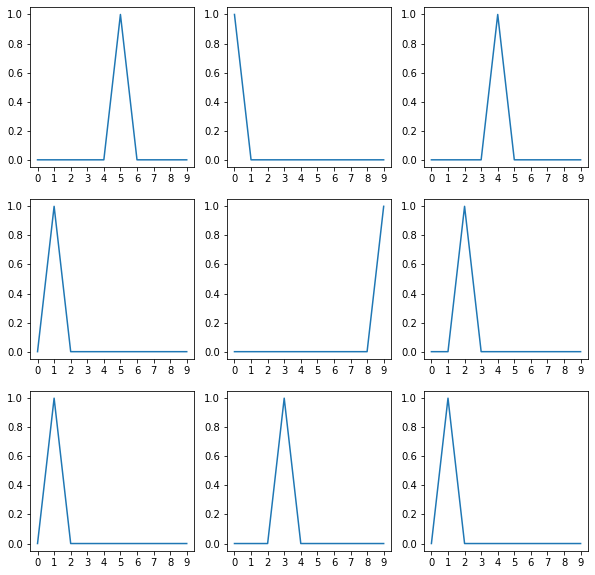

In [ ]:
plt.figure(figsize=(10,10)) 
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks(range(10))
  plt.grid(False)
  plt.plot(y_train[i]) 
plt.show()

# **Designing Neural Network Architecture**

In [6]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [7]:
def plot_model_history(model_name, history):
  plt.figure(figsize=(10,10)) 
  # Plot accuracy of training and validation
  plt.subplot(2,2,1)
  plt.xticks(range(10))
  plt.title(f'Accuracy of {model_name}')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid(False)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['train', 'validation'], loc='lower right')
  # Plot loss of training and validation
  plt.subplot(2,2,2)
  plt.xticks(range(10))
  plt.title(f'Loss of {model_name}')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.grid(False)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

### **Question 1**

#### implement the idea in the previous chapter

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='mse', 
    metrics=['accuracy']
)

In [ ]:
history_fc_mse = model.fit(x_train, y_train, batch_size=64, validation_split = 0.1, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0815 - accuracy: 0.3211 - val_loss: 0.0610 - val_accuracy: 0.5485
Epoch 2/5
844/844 [==============================] - 3s 4ms/step - loss: 0.0503 - accuracy: 0.6534 - val_loss: 0.0361 - val_accuracy: 0.7807
Epoch 3/5
844/844 [==============================] - 3s 4ms/step - loss: 0.0350 - accuracy: 0.7744 - val_loss: 0.0270 - val_accuracy: 0.8348
Epoch 4/5
844/844 [==============================] - 3s 4ms/step - loss: 0.0286 - accuracy: 0.8170 - val_loss: 0.0225 - val_accuracy: 0.8598
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 0.8566
The evaluatation for test set: accuracy: 0.8566 - loss: 0.0223


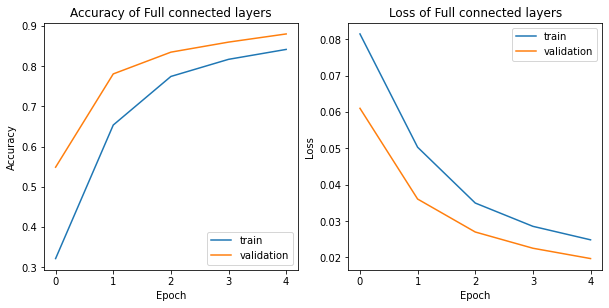

In [ ]:
plot_model_history("Full connected layers", history_fc_mse)

#### Adding some “convolutional layers” to before the “fully connected layers"

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='mse', 
    metrics=['accuracy']
)

In [ ]:
history_cnn_mse = model.fit(x_train, y_train, batch_size=64, validation_split = 0.1, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
844/844 [==============================] - 232s 275ms/step - loss: 0.0878 - accuracy: 0.2654 - val_loss: 0.0839 - val_accuracy: 0.4895
Epoch 2/5
844/844 [==============================] - 224s 265ms/step - loss: 0.0724 - accuracy: 0.6139 - val_loss: 0.0488 - val_accuracy: 0.7603
Epoch 3/5
844/844 [==============================] - 225s 267ms/step - loss: 0.0345 - accuracy: 0.8131 - val_loss: 0.0209 - val_accuracy: 0.8835
Epoch 4/5
844/844 [==============================] - 230s 273ms/step - loss: 0.0207 - accuracy: 0.8791 - val_loss: 0.0148 - val_accuracy: 0.9135
Epoch 5/5
313/313 [==============================] - 10s 32ms/step - loss: 0.0140 - accuracy: 0.9135
The evaluatation for test set: accuracy: 0.9135 - loss: 0.0140


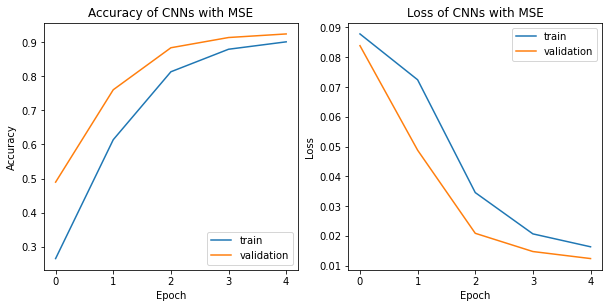

In [ ]:
plot_model_history("CNNs with MSE", history_cnn_mse)

### **Question 2**

#### Implement CNNs use Cross-Entropy loss function

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history_cnn_cs = model.fit(x_train, y_train, batch_size=64, validation_split = 0.1, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
844/844 [==============================] - 148s 175ms/step - loss: 0.3592 - accuracy: 0.8985 - val_loss: 0.1117 - val_accuracy: 0.9677
Epoch 2/5
844/844 [==============================] - 149s 176ms/step - loss: 0.1171 - accuracy: 0.9655 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 3/5
844/844 [==============================] - 147s 175ms/step - loss: 0.0856 - accuracy: 0.9745 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 4/5
844/844 [==============================] - 149s 177ms/step - loss: 0.0696 - accuracy: 0.9793 - val_loss: 0.0585 - val_accuracy: 0.9823
Epoch 5/5
313/313 [==============================] - 7s 21ms/step - loss: 0.0672 - accuracy: 0.9775
The evaluatation for test set: accuracy: 0.9775 - loss: 0.0672


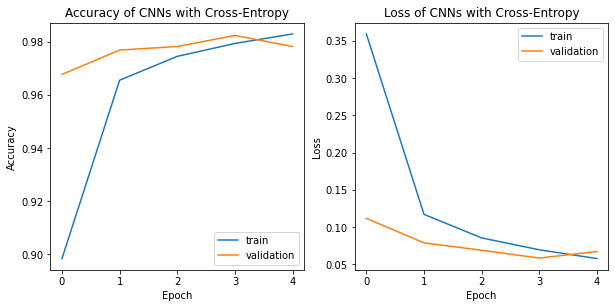

In [ ]:
plot_model_history("CNNs with Cross-Entropy", history_cnn_cs)

### **Question 3**

#### Train the model with Batch Gradient Descent

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, batch_size=x_train.shape[0], epochs=5, shuffle=False)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

Epoch 1/5


#### Train the model with Stochastic Gradient Descent

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history_sgd = model.fit(x_train, y_train, batch_size=1, validation_split = 0.1, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
54000/54000 [==============================] - 480s 9ms/step - loss: 0.1345 - accuracy: 0.9599 - val_loss: 0.0560 - val_accuracy: 0.9840
Epoch 2/5
54000/54000 [==============================] - 412s 8ms/step - loss: 0.0628 - accuracy: 0.9817 - val_loss: 0.0612 - val_accuracy: 0.9838
Epoch 3/5
54000/54000 [==============================] - 436s 8ms/step - loss: 0.0520 - accuracy: 0.9851 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 4/5
54000/54000 [==============================] - 449s 8ms/step - loss: 0.0420 - accuracy: 0.9879 - val_loss: 0.0604 - val_accuracy: 0.9870
Epoch 5/5
313/313 [==============================] - 7s 21ms/step - loss: 0.0707 - accuracy: 0.9850
The evaluatation for test set: accuracy: 0.9850 - loss: 0.0707


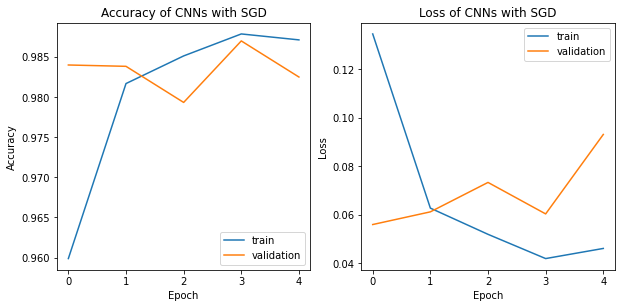

In [ ]:
plot_model_history("CNNs with SGD", history_sgd)

#### Train the model with Mini-Batch Gradient Descent

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history_minibgd = model.fit(x_train, y_train, batch_size=64, validation_split = 0.1, epochs=5)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
844/844 [==============================] - 147s 173ms/step - loss: 0.3566 - accuracy: 0.8989 - val_loss: 0.1147 - val_accuracy: 0.9705
Epoch 2/5
844/844 [==============================] - 143s 169ms/step - loss: 0.1123 - accuracy: 0.9657 - val_loss: 0.0804 - val_accuracy: 0.9775
Epoch 3/5
844/844 [==============================] - 144s 171ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 4/5
844/844 [==============================] - 144s 170ms/step - loss: 0.0670 - accuracy: 0.9793 - val_loss: 0.0613 - val_accuracy: 0.9818
Epoch 5/5
313/313 [==============================] - 6s 21ms/step - loss: 0.0564 - accuracy: 0.9811
The evaluatation for test set: accuracy: 0.9811 - loss: 0.0564


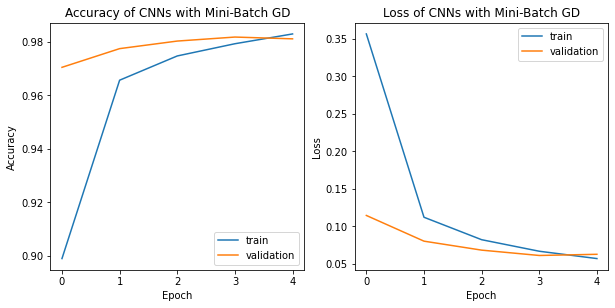

In [ ]:
plot_model_history("CNNs with Mini-Batch GD", history_minibgd)

### **Question 4**

#### Adjust learning rate for a better result

`TriangularSchedule` can be used to dynamically change the learning rate of the optimizer during training.

In [8]:
class TriangularSchedule(tf.keras.callbacks.Callback):
    def __init__(self, base_lr, max_lr, step_size):
        super(TriangularSchedule, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.scale_fn = lambda x: 1.
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}
        if self.clr_iterations == 0:
            tf.keras.backend.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            tf.keras.backend.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None): 
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(tf.keras.backend.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        tf.keras.backend.set_value(self.model.optimizer.lr, self.clr())

Implement CNNs with the above callback `TriangularSchedule`

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)))
# Convolutional layers
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape=(28,28,1), padding = 'Same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
lr_schedule = TriangularSchedule(base_lr=0.01, max_lr=0.1, step_size=64.)

In [15]:
history_lr = model.fit(x_train, y_train, batch_size=64, validation_split=0.1, epochs=5, callbacks=[lr_schedule])

loss, accuracy = model.evaluate(x_test, y_test)
print(f"The evaluatation for test set: accuracy: {accuracy:.4f} - loss: {loss:.4f}")

Epoch 1/5
844/844 [==============================] - 175s 207ms/step - loss: 0.2111 - accuracy: 0.9347 - val_loss: 0.0671 - val_accuracy: 0.9805
Epoch 2/5
844/844 [==============================] - 174s 206ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0458 - val_accuracy: 0.9870
Epoch 3/5
844/844 [==============================] - 172s 204ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0480 - val_accuracy: 0.9872
Epoch 4/5
844/844 [==============================] - 173s 205ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 0.0283 - accuracy: 0.9904
The evaluatation for test set: accuracy: 0.9904 - loss: 0.0283


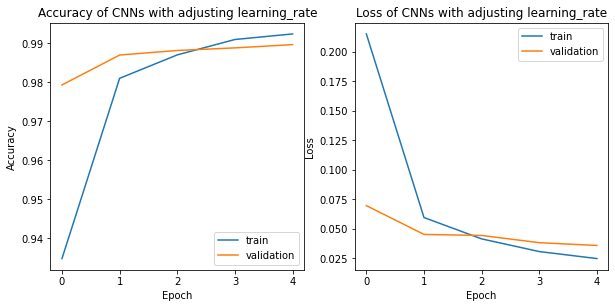

In [ ]:
plot_model_history("CNNs with adjusting learning_rate", history_lr)

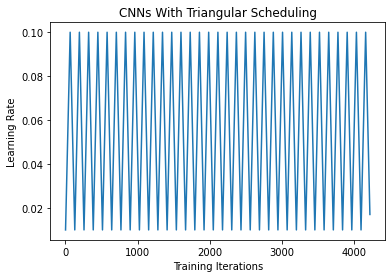

In [ ]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CNNs With Triangular Scheduling")
plt.plot(lr_schedule.history['iterations'], lr_schedule.history['lr'])

# Save Model and Load Model

In [ ]:
model.save('digits.h5')

You can load model for some testing that I have trained to save your time.

In [ ]:
model = tf.keras.models.load_model('digits.h5') 